<a href="https://colab.research.google.com/github/hannesstuehrenberg/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/08-1SHXXXX_football_analytics/projects/08-1SHXXXX_football_analytics/notebooks/05_model_training_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 2.4 MB/s eta 0:00:00


In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch
from mplsoccer import Sbopen
from tqdm import tqdm
import gdown

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Initialize parser
parser = Sbopen()


5. Model Training and Evaluation

* Training process
* Model evaluation (metrics, plots, performance)
* Cross-validation or uncertainty quantification


In [3]:
file_id = '1_WstcnGf_tUzWBj8XTN104EOkFlF5UN_'
url = f'https://drive.google.com/uc?id={file_id}'
shots_master_df = pd.read_csv(url)

print(shots_master_df.shape)

(79966, 67)


In [4]:
shots_master_df = shots_master_df.drop_duplicates()

print(shots_master_df.shape)

(79862, 67)


In [5]:
shots_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79862 entries, 0 to 79965
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           79862 non-null  object 
 1   index                        79862 non-null  int64  
 2   match_id                     79862 non-null  int64  
 3   period                       79862 non-null  int64  
 4   timestamp                    79862 non-null  object 
 5   team_id                      79862 non-null  int64  
 6   team_name                    79862 non-null  object 
 7   player_id                    79862 non-null  float64
 8   player_name                  79862 non-null  object 
 9   position_id                  79862 non-null  float64
 10  position_name                79862 non-null  object 
 11  x                            79862 non-null  float64
 12  y                            79862 non-null  float64
 13  end_x                

In [6]:
feature_columns = [
    'distance_to_goal',
    'angle_to_goal_deg',
    'opponents_in_way',
    'teammates_in_way',
    'with_dominant_foot',
    'shot_first_time',
    'shot_one_on_one',
    'shot_open_goal',
    'technique_Backheel',
    'technique_Diving Header',
    'technique_Half Volley',
    'technique_Lob',
    'technique_Normal',
    'technique_Overhead Kick',
    'technique_Volley',
    'subtype_Free Kick',
    'subtype_Open Play',
    'subtype_Penalty',
    'is_header'
]

from sklearn.model_selection import train_test_split

X = shots_master_df[feature_columns]
y = shots_master_df['goal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

print("\nGoal distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nGoal distribution in test set:")
print(y_test.value_counts(normalize=True))




Training set size: 63889 samples
Test set size: 15973 samples

Goal distribution in training set:
goal
0    0.888087
1    0.111913
Name: proportion, dtype: float64

Goal distribution in test set:
goal
0    0.888124
1    0.111876
Name: proportion, dtype: float64


In [7]:
numerical_features = [
    'distance_to_goal',
    'angle_to_goal_deg',
    'opponents_in_way',
    'teammates_in_way',
    'with_dominant_foot'
]

binary_features = [
    'shot_first_time',
    'shot_one_on_one',
    'shot_open_goal',
    'technique_Backheel',
    'technique_Diving Header',
    'technique_Half Volley',
    'technique_Lob',
    'technique_Normal',
    'technique_Overhead Kick',
    'technique_Volley',
    'subtype_Free Kick',
    'subtype_Open Play',
    'subtype_Penalty',
    'is_header'
]

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('bin', 'passthrough', binary_features)
    ]
)


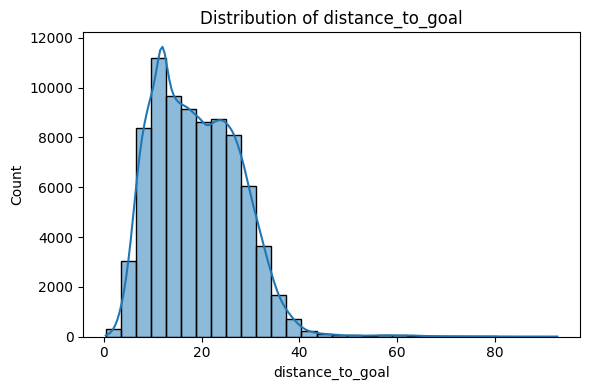

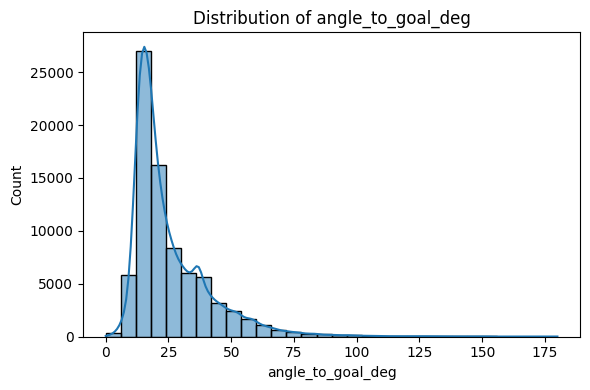

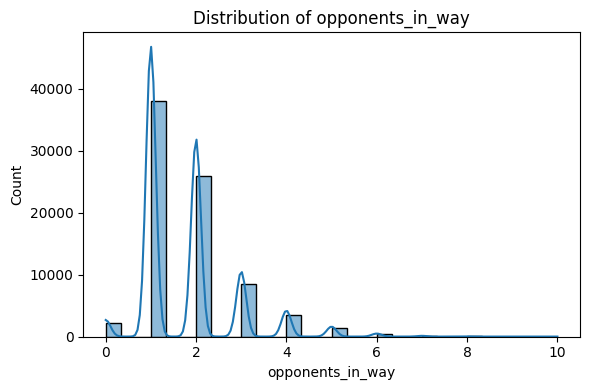

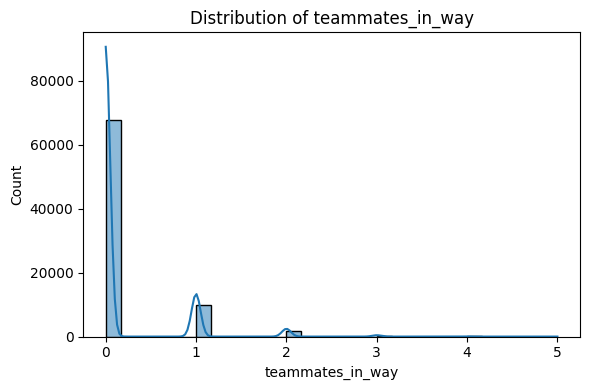

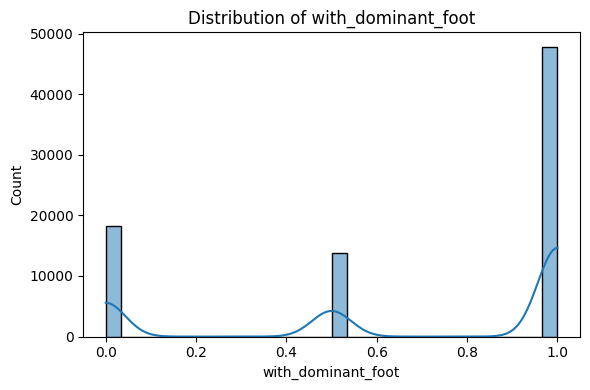

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(shots_master_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


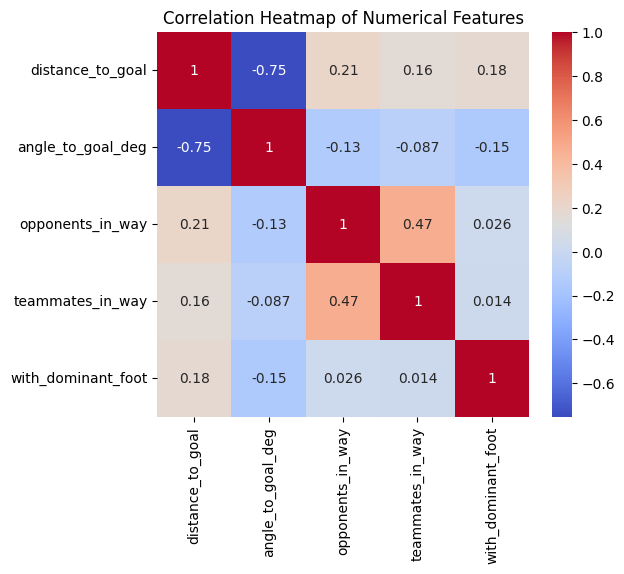

In [9]:
corr = shots_master_df[numerical_features].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_num = shots_master_df[numerical_features]

X_num_const = sm.add_constant(X_num)

In [11]:
import statsmodels.api as sm

vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

print(vif_data)

              Feature       VIF
0    distance_to_goal  4.581543
1   angle_to_goal_deg  2.315673
2    opponents_in_way  4.805525
3    teammates_in_way  1.457450
4  with_dominant_foot  3.648898


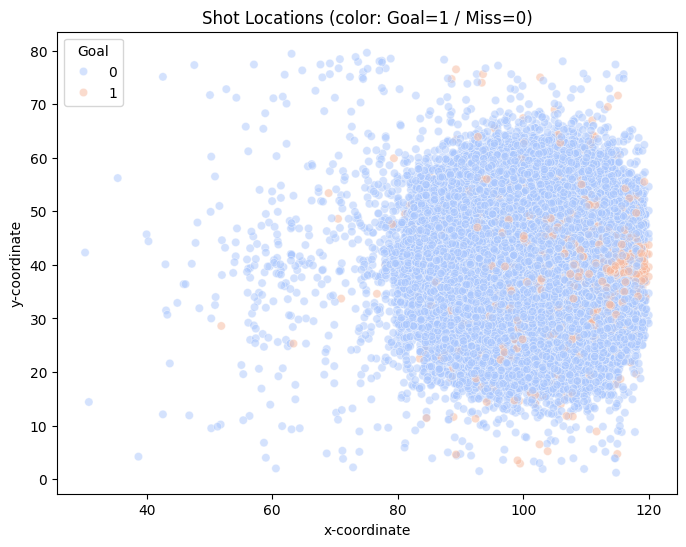

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=shots_master_df,
    x='x', y='y',
    hue='goal',
    palette='coolwarm',
    alpha=0.5
)
plt.title("Shot Locations (color: Goal=1 / Miss=0)")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.legend(title='Goal')
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced',
        random_state=42
    ))
])

In [14]:
pipeline_logistic.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance_to_goal',
                                                   'angle_to_goal_deg',
                                                   'opponents_in_way',
                                                   'teammates_in_way',
                                                   'with_dominant_foot']),
                                                 ('bin', 'passthrough',
                                                  ['shot_first_time',
                                                   'shot_one_on_one',
                                                   'shot_open_goal',
                                                   'technique_Backheel',
                                                   'technique_Diving Header',
                                                   'technique_Half Volley',
                                                   'technique_Lob',
                                                   'technique_Normal',
                                                   'technique_Overhead Kick',
                                                   'technique_Volley',
                                                   'subtype_Free Kick',
                                                   'subtype_Open Play',
                                                   'subtype_Penalty',
                                                   'is_header'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [15]:
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

y_pred_proba = pipeline_logistic.predict_proba(X_test)[:, 1]

#Predict class labels with default threshold 0.5
y_pred = pipeline_logistic.predict(X_test)

In [16]:
y_pred = pipeline_logistic.predict(X_test)
y_pred_proba = pipeline_logistic.predict_proba(X_test)[:, 1]

#Metrics:
auc = roc_auc_score(y_test, y_pred_proba)
acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print(f"AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}")
print(f"Log-Loss: {ll:.3f}")

AUC: 0.807
Accuracy: 0.761
Log-Loss: 0.523


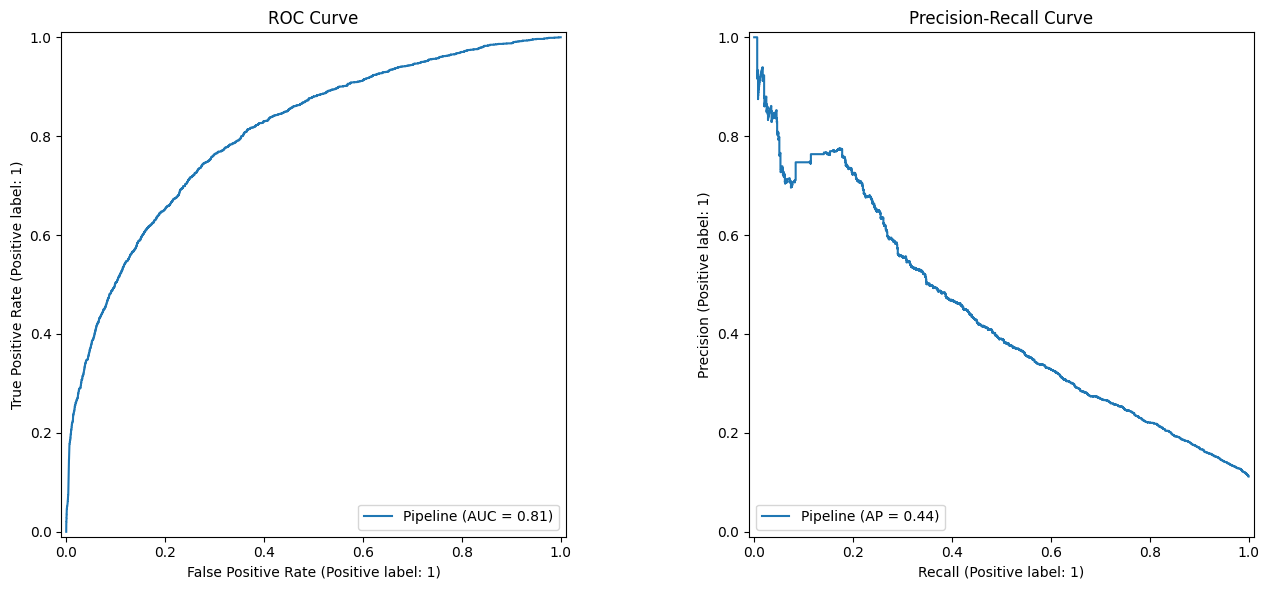

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

roc_display = RocCurveDisplay.from_estimator(pipeline_logistic, X_test, y_test, ax=axes[0])
axes[0].set_title("ROC Curve")

pr_display = PrecisionRecallDisplay.from_estimator(pipeline_logistic, X_test, y_test, ax=axes[1])
axes[1].set_title("Precision-Recall Curve")

plt.tight_layout()
plt.show()

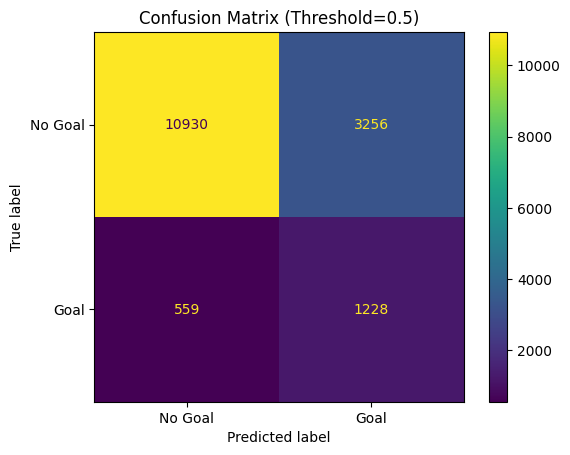

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No Goal", "Goal"]).plot(values_format='d')
plt.title("Confusion Matrix (Threshold=0.5)")
plt.show()


In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.01, 0.05)
precisions, recalls, f1s = [], [], []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh, zero_division=0))

optimal_idx = np.argmax(f1s)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {precisions[optimal_idx]:.3f}")
print(f"Recall at optimal threshold: {recalls[optimal_idx]:.3f}")
print(f"F1 at optimal threshold: {f1s[optimal_idx]:.3f}")


Optimal threshold: 0.70
Precision at optimal threshold: 0.447
Recall at optimal threshold: 0.432
F1 at optimal threshold: 0.439


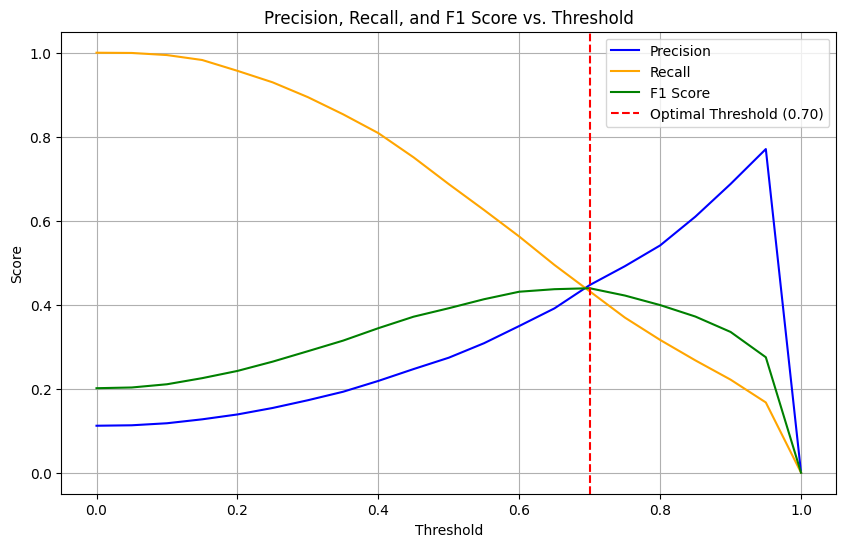

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.plot(thresholds, f1s, label='F1 Score', color='green')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


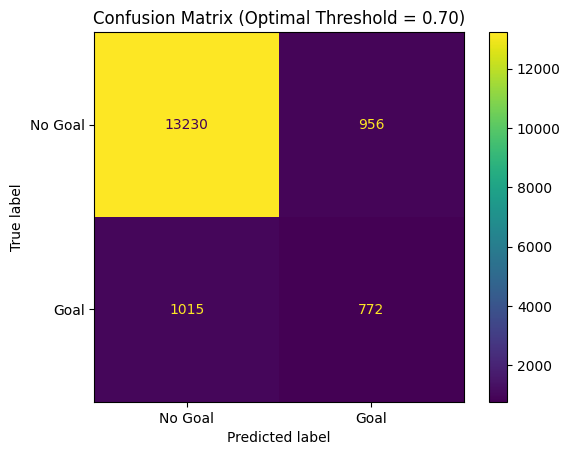

In [21]:
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Goal", "Goal"])
disp.plot(values_format='d')
plt.title(f"Confusion Matrix (Optimal Threshold = {optimal_threshold:.2f})")
plt.show()


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

final_precision = precision_score(y_test, y_pred_optimal, zero_division=0)
final_recall = recall_score(y_test, y_pred_optimal, zero_division=0)
final_f1 = f1_score(y_test, y_pred_optimal, zero_division=0)

print(f"Final Precision: {final_precision:.3f}")
print(f"Final Recall: {final_recall:.3f}")
print(f"Final F1 Score: {final_f1:.3f}")

Final Precision: 0.447
Final Recall: 0.432
Final F1 Score: 0.439


In [23]:
# Recreate final feature list after preprocessing
num_features_scaled = numerical_features  # scaler doesn't change names
bin_features = binary_features            # passthrough leaves names unchanged

all_features = num_features_scaled + bin_features


In [24]:
import pandas as pd

# Extract coefficients from trained logistic regression
coefficients = pipeline_logistic.named_steps['classifier'].coef_[0]

# Create DataFrame for easier viewing
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


                    Feature  Coefficient
11            technique_Lob     1.705519
9   technique_Diving Header     1.065646
17          subtype_Penalty     0.953943
7            shot_open_goal     0.773606
1         angle_to_goal_deg     0.526426
15        subtype_Free Kick     0.510365
6           shot_one_on_one     0.473324
12         technique_Normal     0.316125
5           shot_first_time     0.119083
4        with_dominant_foot     0.030745
3          teammates_in_way    -0.001415
10    technique_Half Volley    -0.192558
14         technique_Volley    -0.327990
2          opponents_in_way    -0.359868
13  technique_Overhead Kick    -0.807609
0          distance_to_goal    -0.820717
16        subtype_Open Play    -1.054239
8        technique_Backheel    -1.349063
18                is_header    -1.593817


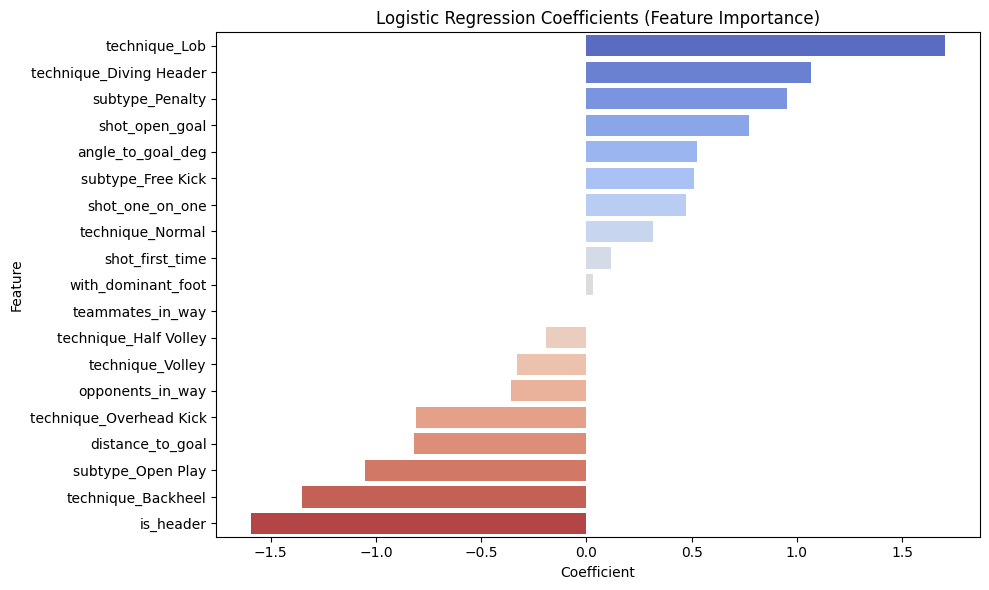

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.tight_layout()
plt.show()


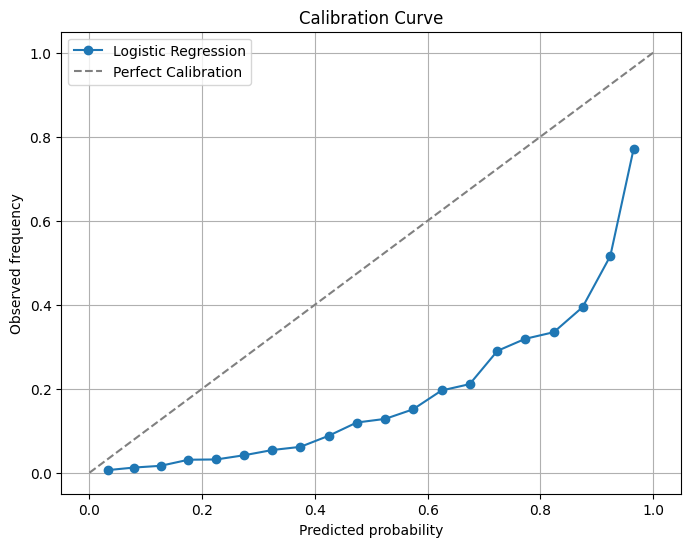

In [26]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=20, strategy='uniform')

plt.figure(figsize=(8,6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted probability')
plt.ylabel('Observed frequency')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_pipeline_logistic = CalibratedClassifierCV(
    estimator=pipeline_logistic,  # your trained pipeline
    method='sigmoid',             # or 'isotonic'
    cv=5                          # internal cross-validation folds for calibration
)

calibrated_pipeline_logistic.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('num',
                                                                                   StandardScaler(),
                                                                                   ['distance_to_goal',
                                                                                    'angle_to_goal_deg',
                                                                                    'opponents_in_way',
                                                                                    'teammates_in_way',
                                                                                    'with_dominant_foot']),
                                                                                  ('bin',
                                                                                   'passthrough',
                                                                                   ['shot_first_time',
                                                                                    'shot_one_on_one',
                                                                                    'shot_open_goal',
                                                                                    'technique_Backheel',
                                                                                    'technique_Diving '
                                                                                    'Header',
                                                                                    'technique_Half '
                                                                                    'Volley',
                                                                                    'technique_Lob',
                                                                                    'technique_Normal',
                                                                                    'technique_Overhead '
                                                                                    'Kick',
                                                                                    'technique_Volley',
                                                                                    'subtype_Free '
                                                                                    'Kick',
                                                                                    'subtype_Open '
                                                                                    'Play',
                                                                                    'subtype_Penalty',
                                                                                    'is_header'])])),
                                                 ('classifier',
                                                  LogisticRegression(class_weight='balanced',
                                                                     max_iter=1000,
                                                                     random_state=42))]))

In [28]:
# Predict probabilities with calibrated model
y_pred_proba_calibrated = calibrated_pipeline_logistic.predict_proba(X_test)[:, 1]

# Recompute AUC, log-loss for calibrated probabilities
from sklearn.metrics import roc_auc_score, log_loss

auc_cal = roc_auc_score(y_test, y_pred_proba_calibrated)
ll_cal = log_loss(y_test, y_pred_proba_calibrated)

print(f"Calibrated AUC: {auc_cal:.3f}")
print(f"Calibrated Log-Loss: {ll_cal:.3f}")


Calibrated AUC: 0.807
Calibrated Log-Loss: 0.278


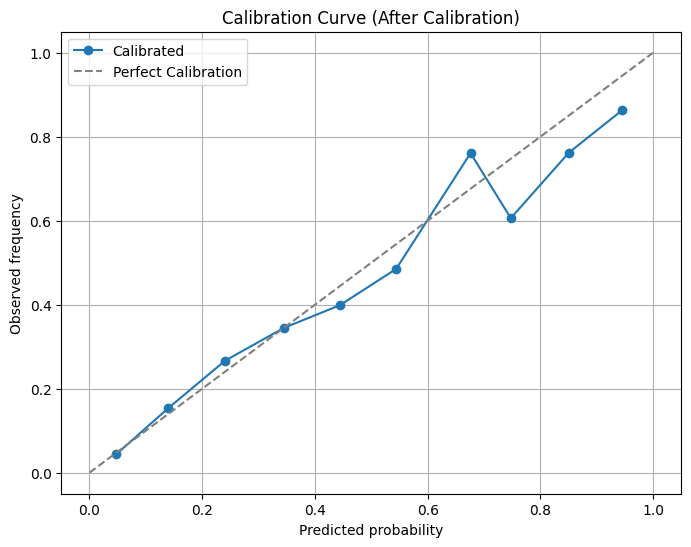

In [29]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_pred_proba_calibrated, n_bins=10)

plt.figure(figsize=(8,6))
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted probability')
plt.ylabel('Observed frequency')
plt.title('Calibration Curve (After Calibration)')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# AUC scores (your existing setup, keep this!)
auc_scores = cross_val_score(
    calibrated_pipeline_logistic, X_train, y_train,
    cv=cv, scoring='roc_auc', n_jobs=-1
)

# Log-loss scores: use built-in scoring string 'neg_log_loss'
logloss_scores = cross_val_score(
    calibrated_pipeline_logistic, X_train, y_train,
    cv=cv, scoring='neg_log_loss', n_jobs=-1
)

# Convert negative log-loss to positive for interpretability
logloss_scores = -logloss_scores

print(f"Cross-validated AUC: mean={auc_scores.mean():.3f}, std={auc_scores.std():.3f}")
print(f"Cross-validated Log-Loss: mean={logloss_scores.mean():.3f}, std={logloss_scores.std():.3f}")

cv_results = pd.DataFrame({
    'AUC': auc_scores,
    'Log-Loss': logloss_scores
})

print(cv_results)

Cross-validated AUC: mean=0.809, std=0.003
Cross-validated Log-Loss: mean=0.278, std=0.002
        AUC  Log-Loss
0  0.810310  0.278375
1  0.809269  0.279013
2  0.809510  0.275792
3  0.813868  0.275637
4  0.804186  0.278977


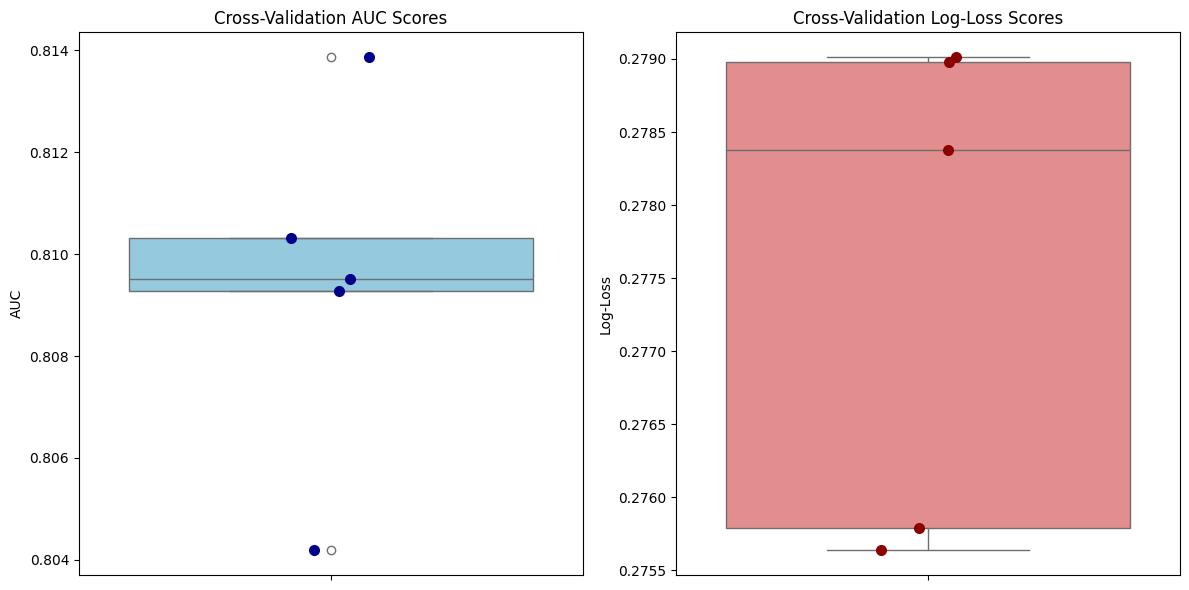

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=cv_results['AUC'], color='skyblue')
sns.stripplot(y=cv_results['AUC'], color='darkblue', jitter=0.1, size=8)
plt.title('Cross-Validation AUC Scores')
plt.ylabel('AUC')

plt.subplot(1, 2, 2)
sns.boxplot(y=cv_results['Log-Loss'], color='lightcoral')
sns.stripplot(y=cv_results['Log-Loss'], color='darkred', jitter=0.1, size=8)
plt.title('Cross-Validation Log-Loss Scores')
plt.ylabel('Log-Loss')

plt.tight_layout()
plt.show()


Bayesian Logistic Regression

In [52]:
import numpy as np

X_train_bayes = X_train_scaled.astype(np.float32)
X_test_bayes = X_test_scaled.astype(np.float32)
y_train_bayes = y_train.values.astype(np.int32)

In [ ]:
import pymc as pm

n_features = X_train_bayes.shape[1]

with pm.Model() as bayesian_logreg:

    intercept = pm.Normal("intercept", mu=0, sigma=5)
    coeffs = pm.Normal("coeffs", mu=0, sigma=5, shape=n_features)

    linear_combination = intercept + pm.math.dot(X_train_bayes, coeffs)

    p = pm.Deterministic("p", pm.math.sigmoid(linear_combination))

    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_train_bayes)

    trace = pm.sample(draws=1000, tune=1000, target_accept=0.9, cores=2, return_inferencedata=True)

import arviz as az
az.summary(trace, var_names=["intercept", "coeffs"], hdi_prob=0.95)



Output()

Neural Network

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

pipeline_nn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(32, 16),  # you can adjust layer sizes
        activation='relu',            # nonlinear activation in hidden layers
        solver='adam',                # good default optimizer
        max_iter=200,                 # increase if not converging
        early_stopping=True,          # stop training if no improvement
        random_state=42
    ))
])


In [33]:
pipeline_nn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance_to_goal',
                                                   'angle_to_goal_deg',
                                                   'opponents_in_way',
                                                   'teammates_in_way',
                                                   'with_dominant_foot']),
                                                 ('bin', 'passthrough',
                                                  ['shot_first_time',
                                                   'shot_one_on_one',
                                                   'shot_open_goal',
                                                   'technique_Backheel',
                                                   'technique_Diving Header',
                                                   'technique_Half Volley',
                                                   'technique_Lob',
                                                   'technique_Normal',
                                                   'technique_Overhead Kick',
                                                   'technique_Volley',
                                                   'subtype_Free Kick',
                                                   'subtype_Open Play',
                                                   'subtype_Penalty',
                                                   'is_header'])])),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16),
                               random_state=42))])

In [34]:
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

y_pred_proba_nn = pipeline_nn.predict_proba(X_test)[:, 1]
y_pred_nn = pipeline_nn.predict(X_test)

auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
acc_nn = accuracy_score(y_test, y_pred_nn)
ll_nn = log_loss(y_test, y_pred_proba_nn)

print(f"Neural Network AUC: {auc_nn:.3f}")
print(f"Neural Network Accuracy: {acc_nn:.3f}")
print(f"Neural Network Log-Loss: {ll_nn:.3f}")


Neural Network AUC: 0.809
Neural Network Accuracy: 0.904
Neural Network Log-Loss: 0.273


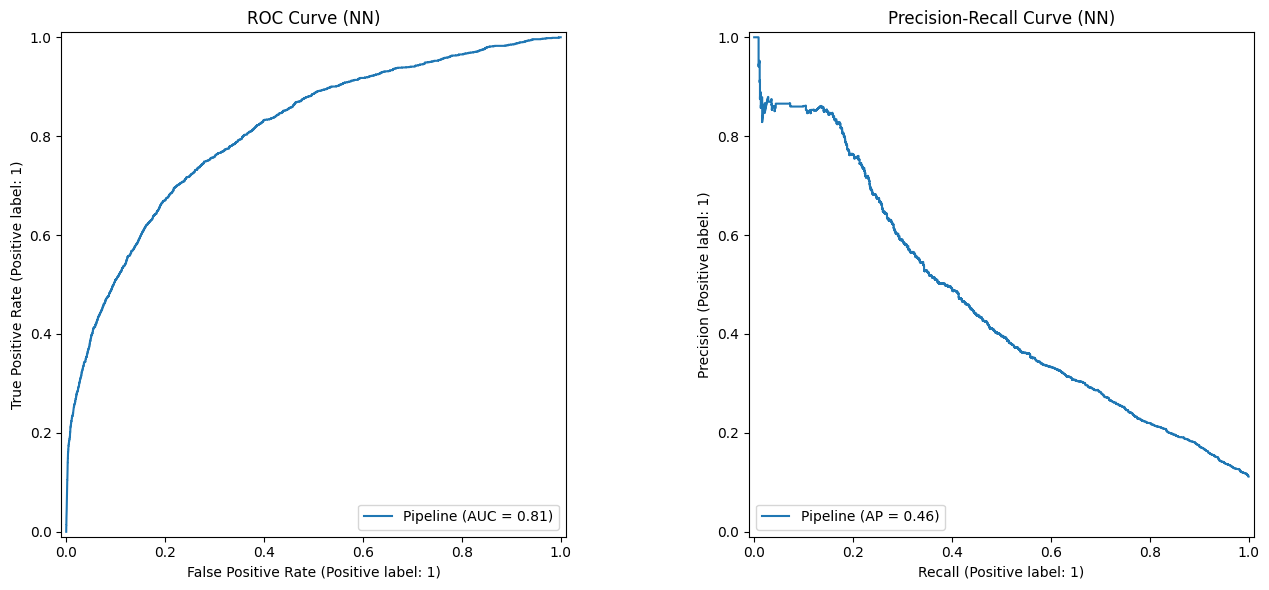

In [35]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
RocCurveDisplay.from_estimator(pipeline_nn, X_test, y_test, ax=axes[0])
axes[0].set_title("ROC Curve (NN)")

PrecisionRecallDisplay.from_estimator(pipeline_nn, X_test, y_test, ax=axes[1])
axes[1].set_title("Precision-Recall Curve (NN)")

plt.tight_layout()
plt.show()


In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.01, 0.05)
precisions, recalls, f1s = [], [], []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_nn >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh, zero_division=0))

optimal_idx = np.argmax(f1s)
optimal_threshold_nn = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold_nn:.2f}")
print(f"Precision at optimal threshold: {precisions[optimal_idx]:.3f}")
print(f"Recall at optimal threshold: {recalls[optimal_idx]:.3f}")
print(f"F1 at optimal threshold: {f1s[optimal_idx]:.3f}")

Optimal threshold: 0.25
Precision at optimal threshold: 0.455
Recall at optimal threshold: 0.436
F1 at optimal threshold: 0.445


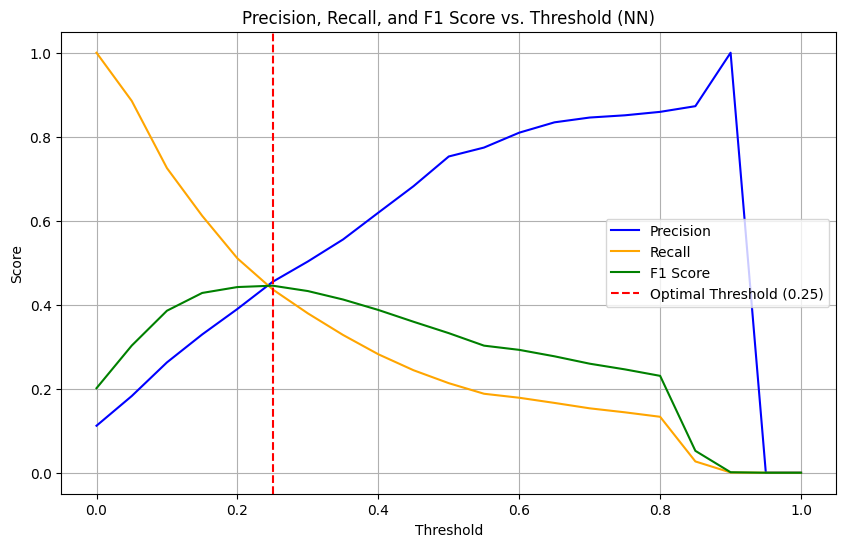

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.plot(thresholds, f1s, label='F1 Score', color='green')
plt.axvline(optimal_threshold_nn, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold_nn:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold (NN)')
plt.legend()
plt.grid(True)
plt.show()


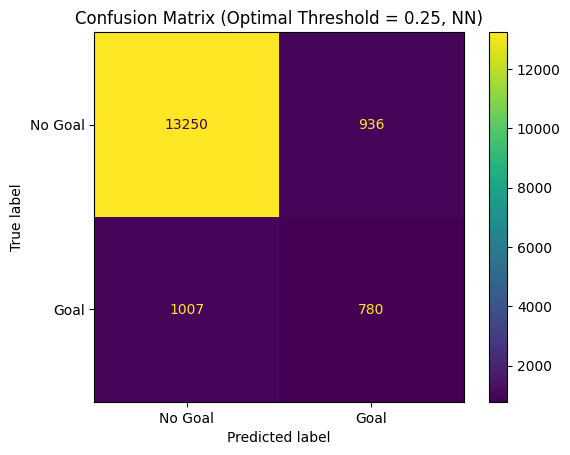

Final Precision (NN): 0.455
Final Recall (NN): 0.436
Final F1 Score (NN): 0.445


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_optimal_nn = (y_pred_proba_nn >= optimal_threshold_nn).astype(int)

cm_nn = confusion_matrix(y_test, y_pred_optimal_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=["No Goal", "Goal"])
disp_nn.plot(values_format='d')
plt.title(f"Confusion Matrix (Optimal Threshold = {optimal_threshold_nn:.2f}, NN)")
plt.show()

final_precision_nn = precision_score(y_test, y_pred_optimal_nn, zero_division=0)
final_recall_nn = recall_score(y_test, y_pred_optimal_nn, zero_division=0)
final_f1_nn = f1_score(y_test, y_pred_optimal_nn, zero_division=0)

print(f"Final Precision (NN): {final_precision_nn:.3f}")
print(f"Final Recall (NN): {final_recall_nn:.3f}")
print(f"Final F1 Score (NN): {final_f1_nn:.3f}")

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cv_nn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores_nn = cross_val_score(
    pipeline_nn, X_train, y_train,
    cv=cv_nn, scoring='roc_auc', n_jobs=-1
)

logloss_scores_nn = cross_val_score(
    pipeline_nn, X_train, y_train,
    cv=cv_nn, scoring='neg_log_loss', n_jobs=-1
)
logloss_scores_nn = -logloss_scores_nn

print(f"Cross-validated AUC (NN): mean={auc_scores_nn.mean():.3f}, std={auc_scores_nn.std():.3f}")
print(f"Cross-validated Log-Loss (NN): mean={logloss_scores_nn.mean():.3f}, std={logloss_scores_nn.std():.3f}")

cv_results_nn = pd.DataFrame({'AUC': auc_scores_nn, 'Log-Loss': logloss_scores_nn})

Cross-validated AUC (NN): mean=0.813, std=0.005
Cross-validated Log-Loss (NN): mean=0.273, std=0.003


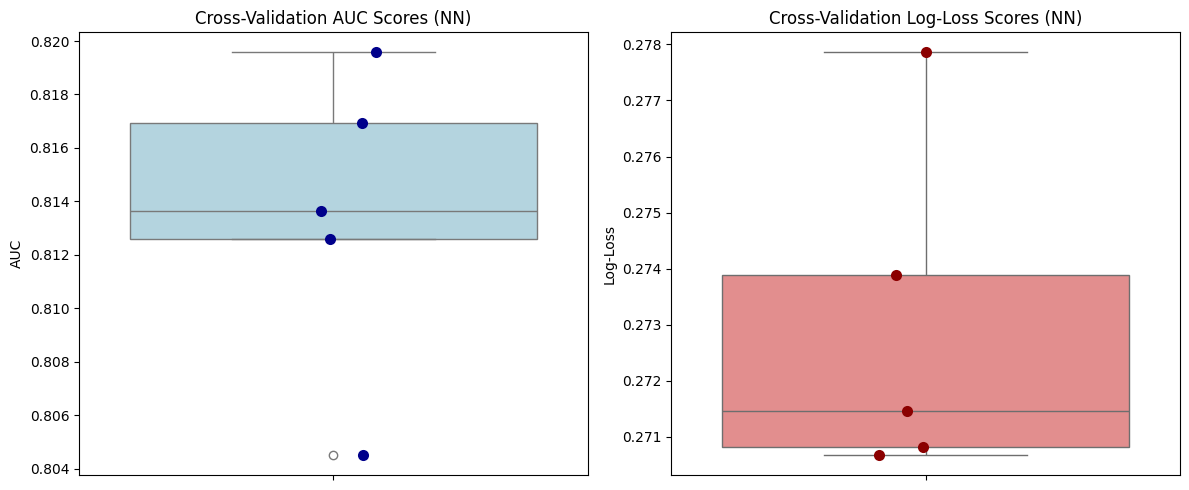

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(y=cv_results_nn['AUC'], color='lightblue')
sns.stripplot(y=cv_results_nn['AUC'], color='darkblue', jitter=0.1, size=8)
plt.title('Cross-Validation AUC Scores (NN)')

plt.subplot(1, 2, 2)
sns.boxplot(y=cv_results_nn['Log-Loss'], color='lightcoral')
sns.stripplot(y=cv_results_nn['Log-Loss'], color='darkred', jitter=0.1, size=8)
plt.title('Cross-Validation Log-Loss Scores (NN)')

plt.tight_layout()
plt.show()

                    Feature  Importance Mean  Importance Std
1         angle_to_goal_deg         0.141863        0.003362
2          opponents_in_way         0.034835        0.002054
18                is_header         0.027674        0.001558
0          distance_to_goal         0.020375        0.001581
10    technique_Half Volley         0.008965        0.001280
16        subtype_Open Play         0.006096        0.000714
6           shot_one_on_one         0.003339        0.000879
15        subtype_Free Kick         0.003242        0.000569
14         technique_Volley         0.003123        0.001016
11            technique_Lob         0.001865        0.000469
12         technique_Normal         0.001515        0.000640
13  technique_Overhead Kick         0.001507        0.000546
3          teammates_in_way         0.001111        0.000625
8        technique_Backheel         0.000961        0.000599
17          subtype_Penalty         0.000869        0.000442
7            shot_open_g

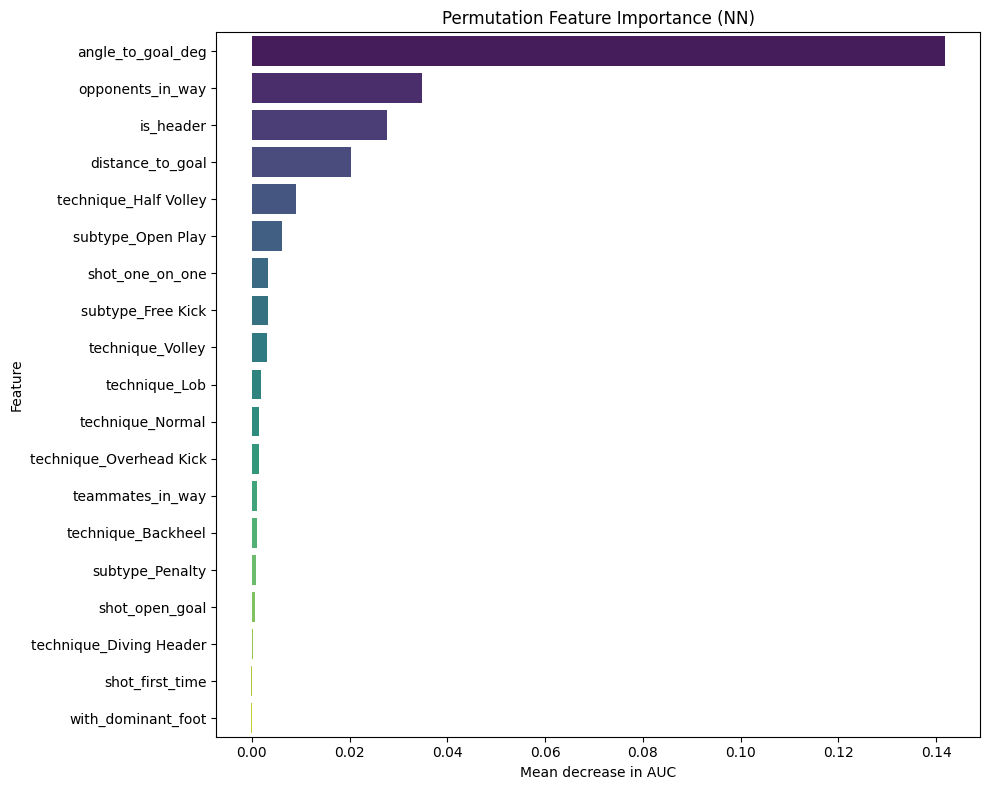

In [41]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute permutation importance on test data
result = permutation_importance(
    pipeline_nn, X_test, y_test,
    n_repeats=10, random_state=42, scoring='roc_auc'
)

# Collect results into a DataFrame
importances_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print(importances_df)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance Mean',
    y='Feature',
    data=importances_df,
    palette='viridis'
)
plt.title('Permutation Feature Importance (NN)')
plt.xlabel('Mean decrease in AUC')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


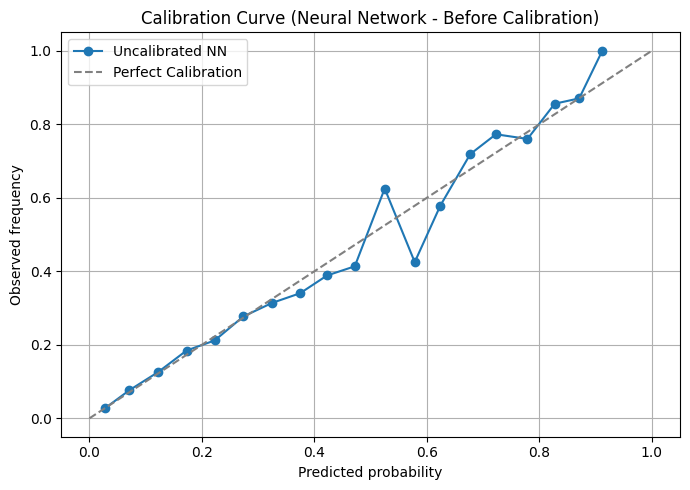

In [42]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get predicted probabilities from your uncalibrated NN
y_pred_proba_nn = pipeline_nn.predict_proba(X_test)[:, 1]

# Compute calibration curve
frac_pos, mean_pred = calibration_curve(y_test, y_pred_proba_nn, n_bins=20)

# Plot calibration curve
plt.figure(figsize=(7,5))
plt.plot(mean_pred, frac_pos, marker='o', label='Uncalibrated NN')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted probability')
plt.ylabel('Observed frequency')
plt.title('Calibration Curve (Neural Network - Before Calibration)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
from sklearn.calibration import CalibratedClassifierCV

# Wrap your trained NN pipeline with CalibratedClassifierCV
calibrated_pipeline_nn = CalibratedClassifierCV(
    estimator=pipeline_nn,
    method='sigmoid',    # or try 'isotonic' for non-parametric calibration
    cv='prefit'          # use the already trained pipeline
)

# Fit calibration on the test set (or better: on a separate validation set if available)
calibrated_pipeline_nn.fit(X_test, y_test)


CalibratedClassifierCV(cv='prefit',
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('num',
                                                                                   StandardScaler(),
                                                                                   ['distance_to_goal',
                                                                                    'angle_to_goal_deg',
                                                                                    'opponents_in_way',
                                                                                    'teammates_in_way',
                                                                                    'with_dominant_foot']),
                                                                                  ('bin',
                                                                                   'passthrough',
                                                                                   ['shot_first_time',
                                                                                    'shot_one_on_one',
                                                                                    'shot_open_goal',
                                                                                    'technique_Backheel',
                                                                                    'technique_Diving '
                                                                                    'Header',
                                                                                    'technique_Half '
                                                                                    'Volley',
                                                                                    'technique_Lob',
                                                                                    'technique_Normal',
                                                                                    'technique_Overhead '
                                                                                    'Kick',
                                                                                    'technique_Volley',
                                                                                    'subtype_Free '
                                                                                    'Kick',
                                                                                    'subtype_Open '
                                                                                    'Play',
                                                                                    'subtype_Penalty',
                                                                                    'is_header'])])),
                                                 ('classifier',
                                                  MLPClassifier(early_stopping=True,
                                                                hidden_layer_sizes=(32,
                                                                                    16),
                                                                random_state=42))]))

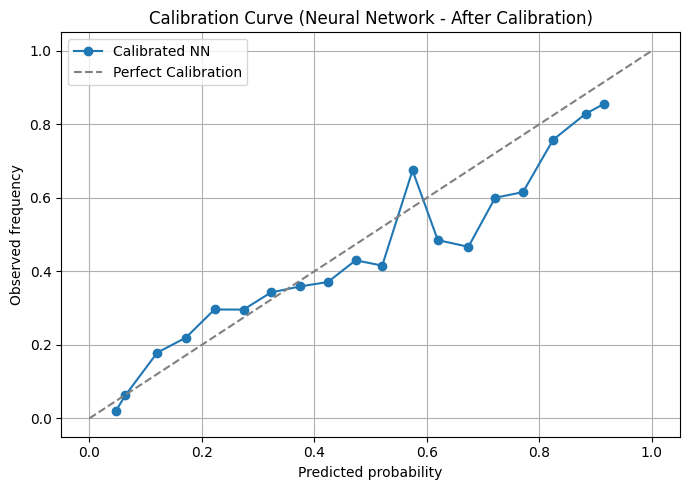

In [44]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Predict calibrated probabilities
y_calibrated_proba_nn = calibrated_pipeline_nn.predict_proba(X_test)[:, 1]

# Compute calibration curve after calibration
frac_pos_cal, mean_pred_cal = calibration_curve(y_test, y_calibrated_proba_nn, n_bins=20)

# Plot calibrated vs. perfect calibration
plt.figure(figsize=(7,5))
plt.plot(mean_pred_cal, frac_pos_cal, marker='o', label='Calibrated NN')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted probability')
plt.ylabel('Observed frequency')
plt.title('Calibration Curve (Neural Network - After Calibration)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
from sklearn.metrics import roc_auc_score, log_loss

cal_auc = roc_auc_score(y_test, y_calibrated_proba_nn)
cal_logloss = log_loss(y_test, y_calibrated_proba_nn)

print(f"Calibrated NN AUC: {cal_auc:.3f}")
print(f"Calibrated NN Log-Loss: {cal_logloss:.3f}")

Calibrated NN AUC: 0.809
Calibrated NN Log-Loss: 0.279


Backup

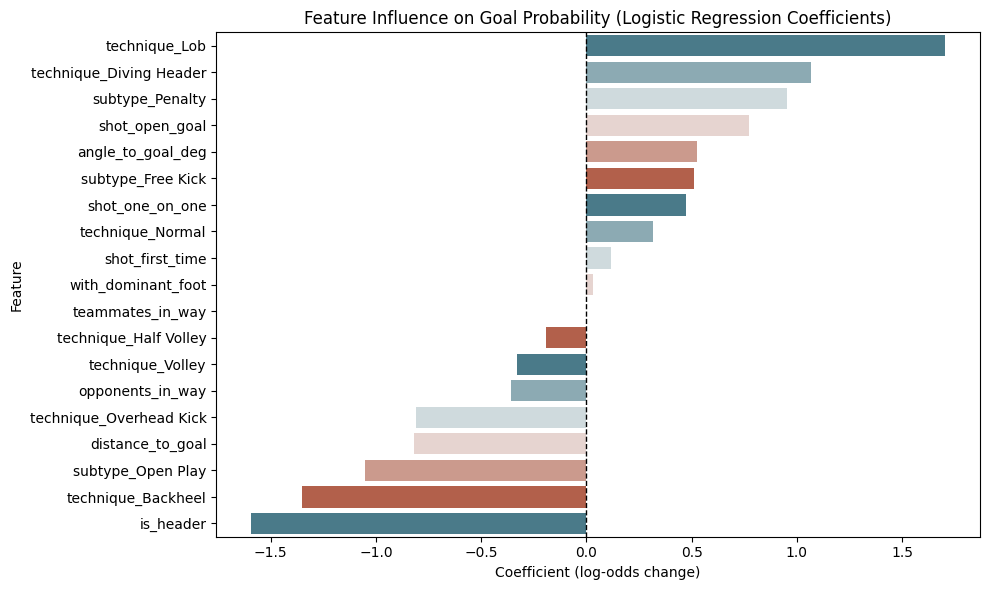

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df,
    palette=sns.diverging_palette(220, 20, as_cmap=False)
)
plt.title("Feature Influence on Goal Probability (Logistic Regression Coefficients)")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Coefficient (log-odds change)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [47]:
import numpy as np

# Generate grid points (x: 0-120, y: 0-80, or depending on your pitch dimensions)
x_vals = np.linspace(0, 120, 100)  # pitch length
y_vals = np.linspace(0, 80, 80)    # pitch width

xx, yy = np.meshgrid(x_vals, y_vals)
grid_points = np.column_stack([xx.ravel(), yy.ravel()])


In [48]:
import pandas as pd

# Convert to DataFrame
grid_df = pd.DataFrame(grid_points, columns=['x', 'y'])

# Calculate distance and angle to goal center (x=120, y=40 for right goal)
goal_x, goal_y = 120, 40
grid_df['distance_to_goal'] = np.sqrt((goal_x - grid_df['x'])**2 + (goal_y - grid_df['y'])**2)
grid_df['angle_to_goal_deg'] = np.degrees(np.arctan2(
    7.32 / 2,  # half goal width
    grid_df['distance_to_goal']
))

# Add other required features as needed, e.g., zero opponents/teammates, zeros for one-hot dummies
for col in categorical_features:
    grid_df[col] = 0
grid_df['opponents_in_way'] = 0
grid_df['teammates_in_way'] = 0

# Use only columns your model was trained on
X_grid = grid_df[numerical_features + categorical_features]


NameError: name 'categorical_features' is not defined

In [ ]:
# Predict probability of goal
goal_probs = pipeline_balanced.predict_proba(X_grid)[:, 1]


In [ ]:
stats = pitch.bin_statistic(
    grid_df['x'],
    grid_df['y'],
    values=goal_probs,
    statistic='mean',
    bins=(100, 80)  # match your grid resolution
)

fig, ax = pitch.draw(figsize=(8, 6))
pcm = pitch.heatmap(stats, ax=ax, cmap='Reds', alpha=0.7)
cbar = fig.colorbar(pcm, ax=ax)
cbar.ax.set_ylabel('Probability of goal')

plt.title("Probability of goal across pitch")
plt.tight_layout()
plt.show()



In [ ]:
import pymc as pm
import numpy as np

X_bayes_df = X_train.copy()
for col in X_bayes_df.columns:
    if X_bayes_df[col].dtype == bool:
        X_bayes_df[col] = X_bayes_df[col].astype(int)


# Make sure X_train and y_train are numpy arrays
X_bayes = X_bayes_df.values.astype(np.float32)  # force numeric type for PyMC compatibility
y_bayes = y_train.values.astype(np.int32)       # target should also be numeric

with pm.Model() as blr:
    # Prior: Gaussian prior over weights (shape: n_features)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_bayes.shape[1])

    # Prior: Intercept
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Linear combination (log-odds)
    logits = intercept + pm.math.dot(X_bayes, beta)

    # Likelihood: Bernoulli with logistic link
    pm.Bernoulli("obs", logit_p=logits, observed=y_bayes)

    # Sample from the posterior
    trace = pm.sample(draws=500, tune=500, target_accept=0.9, cores=1, return_inferencedata=True)


In [ ]:
pip install torch torchvision

In [ ]:
import matplotlib.pyplot as plt

plt.plot(thresholds, f1_scores, label='F1 score')
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.show()